# Regressão Linear

A regressão linear consiste em tentar explicar o comportamento de uma variável, dita *dependente*, a partir de uma ou mais variáveis, ditas *independentes*, com um modelo linear.



## 1. Regressão Linear Simples

A regressão linear simples trata de apenas uma variável independente.

seja $Y = \left\{y_1, y_2, \ldots, y_n\right\}$ uma amostra do conjunto de variáveis independentes e $X = \left\{x_1, x_2, \ldots, x_n\right\}$

O modelo linear para o comportamento destas variáveis é dado pela equação:

\begin{equation}
y_i = w_0 + w_1 x_i + \epsilon_i
\end{equation}

Onde $w_0, w_1$ são *parâmetros* do modelo e $\epsilon_i$ são *resíduos* (a diferença entre o modelo real e os dados realmente observados).

A hipótese do modelo linear é a de que os resíduos são variáveis aleatórias *independentes* distribuídas de acordo com uma distribuição *Gaussiana* de valor esperado *nulo*.

Isso equivale a supor que as variáveis independentes são resultado da reta $y = w_0 + w_1 x$ sobreposta a um ruído Gaussiano.

Adicionando-se a hipótese de que os ruídos Gaussianos são todos com a mesma covariância, os parâmetros da reta de *máxima verissimilhança* são dados por:

\begin{equation}
\underset{w_0, w_1}{\mbox{arg min}} \sum_i \epsilon_i^2= \sum_i \left(y_i - w_0 - w_1 x_i\right)^2
\end{equation}

Definindo-se:

\begin{align}
\bar{x} &= \frac{1}{n}\sum_i x_i \\
\bar{y} &= \frac{1}{n}\sum_i y_i \\
s_{xx} &= \sum_i (x_i - \bar{x})^2 \\
s_{yy} &= \sum_i (y_i - \bar{y})^2 \\
s_{xy} &= \sum_i (x_i - \bar{x})(y_i - \bar{y})
\end{align}

Então tem-se:

\begin{align}
w_1 &= \frac{s_{xy}}{s_{xx}}\\
w_0 &= \bar{y} - w_1 \bar{x}
\end{align}

E finalmente, a soma total dos quadrados dos resíduos é dada por:

\begin{equation}
\sum_i \epsilon_i^2=s_{yy}\left(1-\frac{{s_{xy}}^2}{s_{xx} s_{yy}}\right)
\end{equation}

O valor

\begin{equation}
\frac{s_{xy}}{\sqrt{s_{xx} s_{yy}}}
\end{equation}

é chamado de *coeficiente de correlação de Pearson*. Este é um valor que varia de -1 a 1 e mede o quão bem a variável dependente pode ser explicada por um modelo linear da variável dependente.
Valores mais próximos de zero significam um modelo linear menos explicativo.
Valores mais próximos de 1 ou -1 significam um modelo linar mais explicativo.



### Exercício 1.1:

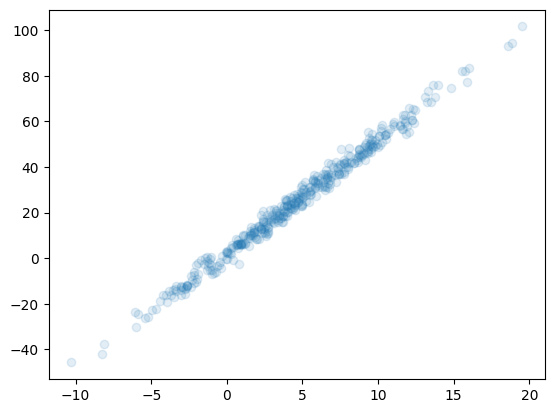

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.random.normal(5, 5, 400)
y = 5*x + 2 + np.random.normal(0, 2.5, 400)
plt.scatter(x=x, y=y,alpha=0.125)
plt.show()

A variável ```y``` é gerada artificialmente a partir de um modelo linear $y = 5x +2$ sobreposto a um ruído Gaussiano.

Determine:

  a) Os valores de $\bar{x}$, $\bar{y}$

In [2]:
import numpy as np

x = np.random.normal(5, 5, 400)
y = 5 * x + 2 + np.random.normal(0, 2.5, 400)

mean_x = np.mean(x)
mean_y = np.mean(y)

mean_x, mean_y


(np.float64(5.258747157995224), np.float64(28.373991468576552))

b) Os valores de $S_{xx}$, $S_{xy}$, $S_{yy}$

1.   Item da lista
2.   Item da lista



In [3]:

mean_x = np.mean(x)
mean_y = np.mean(y)


s_xx = np.sum((x - mean_x) ** 2)
s_yy = np.sum((y - mean_y) ** 2)
s_xy = np.sum((x - mean_x) * (y - mean_y))

s_xx, s_xy, s_yy

(np.float64(10147.189025848773),
 np.float64(50944.43148011289),
 np.float64(258063.07898983028))

c) Os valores de  $w_0$ e $w_1$ no modelo $y_i = w_0 + w_1 x_i + \epsilon_i$ de máxima verissimilhança.

In [4]:
# Calcular w_1
w_1 = s_xy / s_xx

# Calcular w_0
w_0 = mean_y - w_1 * mean_x

w_0, w_1

(np.float64(1.9722083166837088), np.float64(5.0205462173157445))



```
# Isto está formatado como código
```

d) Repita a plotagem *scatter* do enunciado sobreposta à reta $y=w_0 + w_1 x$

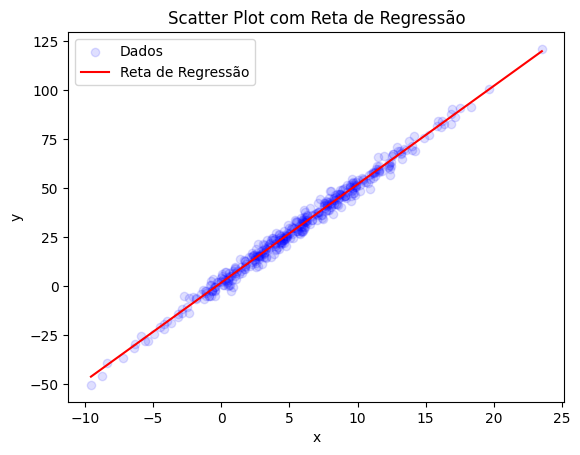

In [5]:
x = np.random.normal(5, 5, 400)
y = 5*x + 2 + np.random.normal(0, 2.5, 400)

mean_x = np.mean(x)
mean_y = np.mean(y)
s_xx = np.sum((x - mean_x) ** 2)
s_xy = np.sum((x - mean_x) * (y - mean_y))
w_1 = s_xy / s_xx
w_0 = mean_y - w_1 * mean_x

x_line = np.linspace(min(x), max(x), 100)
y_line = w_0 + w_1 * x_line

# Plota
plt.scatter(x, y, alpha=0.125, label='Dados', color='blue')
plt.plot(x_line, y_line, color='red', label='Reta de Regressão')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot com Reta de Regressão')
plt.legend()
plt.show()



```
# Isto está formatado como código
```

e) Calcule o resíduo quadrático total $\sum_i \epsilon_i^2$

In [6]:

y_pred = w_0 + w_1 * x

residuals = y - y_pred
residual_sum_of_squares = np.sum(residuals ** 2)

print(f'Resíduo quadrático total: {residual_sum_of_squares:.2f}')

Resíduo quadrático total: 2680.77


f) Calcule o coeficiente de correlação de Pearson
\begin{equation}
r = \frac{s_{xy}}{\sqrt{s_{xx} s_{yy}}}
\end{equation}

Compare o valor $s_{yy}(1-r^2)$ com o obtido no item e).

In [7]:
# Calcular o coeficiente de correlação de Pearson
r = s_xy / np.sqrt(s_xx * s_yy)

# Calcular s_yy(1 - r^2)
comparison_value = s_yy * (1 - r**2)

# Resíduo quadrático total (calculado anteriormente)
w_1 = s_xy / s_xx
w_0 = mean_y - w_1 * mean_x
y_pred = w_0 + w_1 * x
residuals = y - y_pred
residual_sum_of_squares = np.sum(residuals ** 2)

print(f'Coeficiente de correlação de Pearson: {r:.2f}')
print(f'Valor de s_yy(1 - r^2): {comparison_value:.2f}')
print(f'Resíduo quadrático total: {residual_sum_of_squares:.2f}')

Coeficiente de correlação de Pearson: 1.01
Valor de s_yy(1 - r^2): -3326.69
Resíduo quadrático total: 2680.77


g) Repita o processo (encontrando os valores de $w_0$, $w_1$, $r$ e a plotagem) usando a biblioteca ```sklearn```
Você deve usar a classe ```LinearRegression``` do pacote ```sklearn.linear_model```.

Crie um objeto da classe ```LinearRegression``` e invoque o método ```fit```, passando como parâmetros ```x.reshape(-1,1)``` (para transformar o vetor em uma matriz coluna) e ```y```.

O valor de $w_0$ pode ser encontrado no atributo ```ìntercept_```.
O valor de $w_1$ pode ser encontrado no primeiro coeficiente do atributo ```coef_```.

O coeficiente de Pearson *ao quadrado* $r²$ pode ser obtido do método ```score``` repassando a ele os mesmos dados passados em ```fit```.
Note que você deve extrair a raiz quadrada deste valor para obter $r$.

Para calcular o vetor de valores previstos, chame o método ```predict``` passando como parâmetro ```x.reshape(-1,1)```.


In [8]:
from sklearn import linear_model

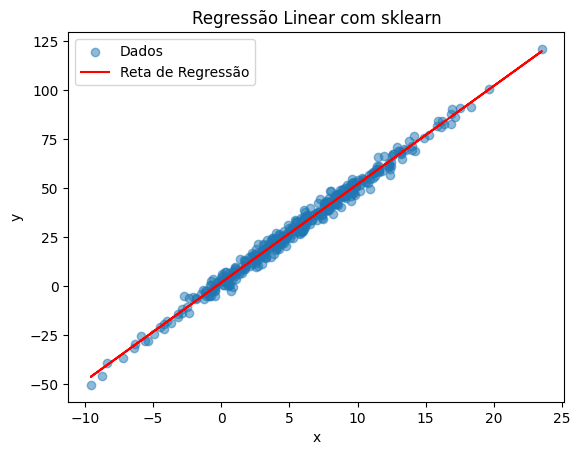

Intercepto (w_0): 1.90
Coeficiente de inclinação (w_1): 5.01
Coeficiente de correlação de Pearson (r): 0.99


In [9]:
from sklearn.linear_model import LinearRegression
# Transformar x em uma matriz coluna
x_reshape = x.reshape(-1, 1)

# Criar e ajustar o modelo de regressão linear
model = LinearRegression()
model.fit(x_reshape, y)

# Coeficientes
w_0 = model.intercept_
w_1 = model.coef_[0]

# Coeficiente de correlação de Pearson
r_squared = model.score(x_reshape, y)
r = np.sqrt(r_squared)

# Prever valores de y
y_pred = model.predict(x_reshape)

# Plotagem
plt.scatter(x, y, label='Dados', alpha=0.5)
plt.plot(x, y_pred, color='red', label='Reta de Regressão')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regressão Linear com sklearn')
plt.legend()
plt.show()

print(f'Intercepto (w_0): {w_0:.2f}')
print(f'Coeficiente de inclinação (w_1): {w_1:.2f}')
print(f'Coeficiente de correlação de Pearson (r): {r:.2f}')

### Exercício 1.2

Este [arquivo](https://gitlab.uspdigital.usp.br/thiago/curso-ai-intro-ap/-/raw/main/escolas_turmas_alunos_2017.csv) contém um conjunto compilado de dados da Secretaria Estadual de Educação que trata de alunos do ensino médio em 2017.

A coluna ```CD_ESCOLA``` é um código interno da Secretaria que identifica uma Escola.

A coluna ```APR_3``` contém a taxa de aprovação no ensino médio por escola.

A coluna ```QTDE_ALUNOS``` contém o total de alunos matriculados no ensino médio por escola.

A coluna ```TURMAS``` contém a quantidade total de turmas de ensino médio.

O código a seguir importa os dados em uma base de dados Pandas de nome ```aprovacao_e_alunos_por_escola``` e computa uma nova coluna, ```MEDIA_POR_TURMA```, com o número médio de alunos por turma por escola.

Note que a quantidade de turmas varia significativamente de escola para escola.

,CD_ESCOLA,APR_3,QTDE_ALUNOS,TURMAS,MEDIA_POR_TURMA
0,21623,99.42,172,6,28.666667
1,21726,99.71,345,10,34.500000
2,21748,100.00,239,7,34.142857
3,41661,98.76,161,6,26.833333
4,49967,75.92,259,9,28.777778
...,...,...,...,...,...
3702,48461,89.52,120,4,30.000000
3703,49517,69.68,444,15,29.600000
3704,909524,75.24,259,10,25.900000
3705,914927,85.12,204,7,29.142857


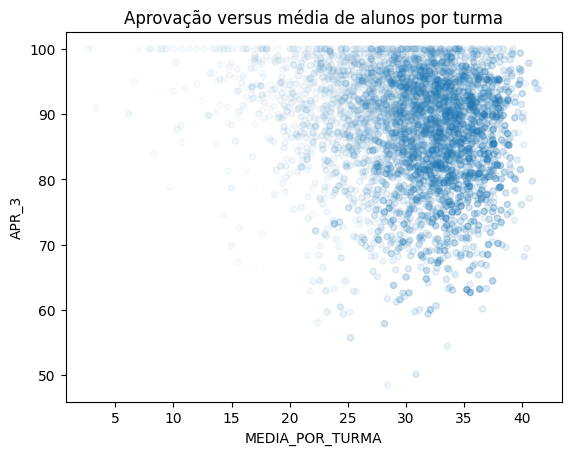

In [10]:
import urllib.request as request
import io
import pandas as pd
aprovacao_e_alunos_por_escola=pd.read_csv(io.TextIOWrapper(request.urlopen("https://gitlab.uspdigital.usp.br/thiago/curso-ai-intro-ap/-/raw/main/escolas_turmas_alunos_2017.csv"), "utf-8-sig"))
aprovacao_e_alunos_por_escola['MEDIA_POR_TURMA'] = aprovacao_e_alunos_por_escola['QTDE_ALUNOS']/aprovacao_e_alunos_por_escola['TURMAS']
max_turmas = aprovacao_e_alunos_por_escola['TURMAS'].max()

opacidade = np.array(aprovacao_e_alunos_por_escola['TURMAS'])/(2*max_turmas)
aprovacao_e_alunos_por_escola.plot.scatter(x="MEDIA_POR_TURMA", y="APR_3", title="Aprovação versus média de alunos por turma", alpha =opacidade)
display(aprovacao_e_alunos_por_escola)
plt.show()

Deseja-se investigar uma possível relação linear entre a média de alunos por turma e a taxa de aprovação.

Para tanto determine:

a) Os coeficientes $w_0$ e $w_1$ de um modelo linear de aprovação em função do total de alunos matriculados.
Como mencionado, a quantidade de turmas varia significativamente de escola para escola.
Isso significa que o *peso* de cada ponto é diferente!
Você deve usar a quantidade de turmas como peso para fazer esta regressão.

#### *Sugestão*:
Use novamente a classe ```LinearModel```.
O método ```fit``` tem um terceiro parâmetro que recebe um vetor com os pesos relativos para cada amostra.

Coeficiente de interceptação (w_0): 92.9411
Coeficiente angular (w_1): -0.1926


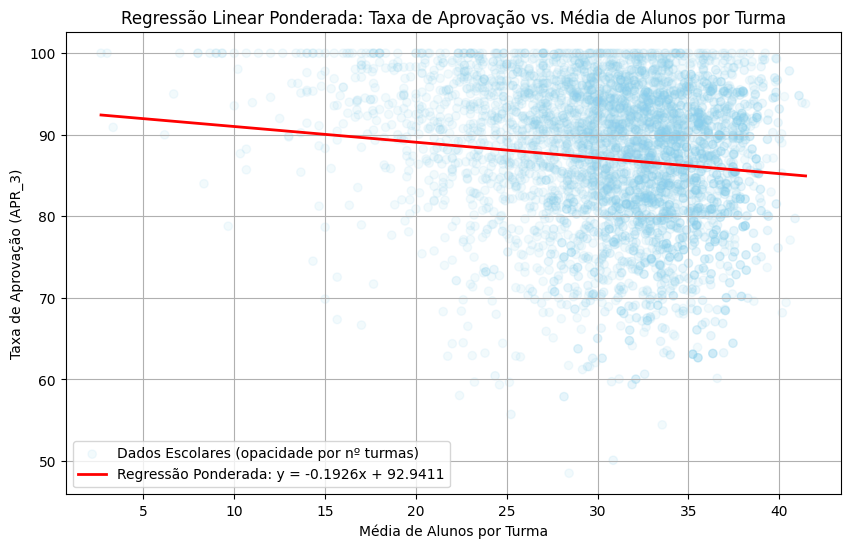

In [30]:



aprovacao_e_alunos_por_escola=pd.read_csv(io.TextIOWrapper(request.urlopen("https://gitlab.uspdigital.usp.br/thiago/curso-ai-intro-ap/-/raw/main/escolas_turmas_alunos_2017.csv"), "utf-8-sig"))
aprovacao_e_alunos_por_escola['MEDIA_POR_TURMA'] = aprovacao_e_alunos_por_escola['QTDE_ALUNOS']/aprovacao_e_alunos_por_escola['TURMAS']

aprovacao_e_alunos_por_escola.replace([np.inf, -np.inf], np.nan, inplace=True)
aprovacao_e_alunos_por_escola.dropna(subset=['MEDIA_POR_TURMA', 'APR_3', 'TURMAS'], inplace=True)


# a) Determinar os coeficientes w_0 e w_1 com ponderação


x_media_turma = aprovacao_e_alunos_por_escola['MEDIA_POR_TURMA'].values.reshape(-1, 1)
y_aprovacao = aprovacao_e_alunos_por_escola['APR_3'].values
pesos_turmas = aprovacao_e_alunos_por_escola['TURMAS'].values

modelo_ponderado = LinearRegression()

modelo_ponderado.fit(x_media_turma, y_aprovacao, sample_weight=pesos_turmas)

w_0 = modelo_ponderado.intercept_
w_1 = modelo_ponderado.coef_[0]

print(f"Coeficiente de interceptação (w_0): {w_0:.4f}")
print(f"Coeficiente angular (w_1): {w_1:.4f}")

plt.figure(figsize=(10, 6))


max_turmas = aprovacao_e_alunos_por_escola['TURMAS'].max()
opacidade = np.array(aprovacao_e_alunos_por_escola['TURMAS'])/(2*max_turmas)
opacidade = np.clip(opacidade, 0.1, 1.0)


plt.scatter(aprovacao_e_alunos_por_escola['MEDIA_POR_TURMA'], aprovacao_e_alunos_por_escola['APR_3'], alpha=opacidade, label='Dados Escolares (opacidade por nº turmas)', color='skyblue')


x_plot = np.linspace(x_media_turma.min(), x_media_turma.max(), 100).reshape(-1, 1)
y_plot = modelo_ponderado.predict(x_plot)
plt.plot(x_plot, y_plot, color='red', linewidth=2, label=f'Regressão Ponderada: y = {w_1:.4f}x + {w_0:.4f}')

plt.xlabel("Média de Alunos por Turma")
plt.ylabel("Taxa de Aprovação (APR_3)")
plt.title("Regressão Linear Ponderada: Taxa de Aprovação vs. Média de Alunos por Turma")
plt.legend()
plt.grid(True)
plt.show()

b) O coeficiente de correlação de Pearson $r$ e seu valor ao quadrado $r^2$



In [31]:

r_squared_ponderado = modelo_ponderado.score(x_media_turma, y_aprovacao, sample_weight=pesos_turmas)

r_ponderado = np.sqrt(r_squared_ponderado)
if w_1 < 0:
    r_ponderado = -r_ponderado

print(f"Coeficiente de determinação ponderado (R²): {r_squared_ponderado:.4f}")
print(f"Coeficiente de correlação de Pearson ponderado (r): {r_ponderado:.4f}")

Coeficiente de determinação ponderado (R²): 0.0103
Coeficiente de correlação de Pearson ponderado (r): -0.1015


c) O gráfico do enunciado sobreposto à reta determinada no item a).

<ipython-input-33-33f1e4a49559>:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


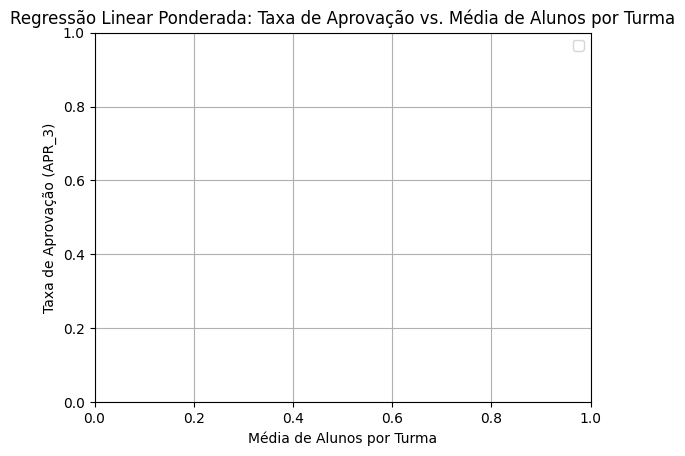

In [33]:
plt.xlabel("Média de Alunos por Turma")
plt.ylabel("Taxa de Aprovação (APR_3)")
plt.title("Regressão Linear Ponderada: Taxa de Aprovação vs. Média de Alunos por Turma")
plt.legend()
plt.grid(True)
plt.show()

## 2. Regressão multi-Linear

A regressão multi-linear trata da relação de uma variável dependente com *múltiplas* variáveis independentes.


seja

\begin{equation}
Y = \begin{bmatrix}y_1\\
y_2\\
\vdots\\
y_n\end{bmatrix}
\end{equation}

 um vetor com uma amostra do conjunto de variáveis independentes e

\begin{equation}
X = \begin{bmatrix}x_{1,1} & x_{1,2} & \ldots & x_{1,m} & 1\\
x_{2,1} & x_{2,2} & \ldots & x_{2,m} & 1\\
 \vdots & \vdots & \ddots & \vdots & \vdots\\
x_{n,1} & x_{n,2} & \ldots & x_{n,m} & 1\end{bmatrix}
\end{equation}

uma matriz $n \times (m+1)$ cujas primeiras $m$ colunas são compostas por uma amostra de cada uma das $m$ variáveis independetes e a sua *última* coluna é composta da constante 1.

O modelo linear para o comportamento destas variáveis é dado pela equação:

\begin{equation}
Y =  X W + E
\end{equation}

Onde:

\begin{equation}
W = \begin{bmatrix}w_1\\
w_2\\
\vdots\\
w_m\\
w_0
\end{bmatrix}
\end{equation}

é o vetor  de $(m+1)$ componentes dos coeficientes de cada uma das variáveis
independentes.
Note que nesta notação o coeficiente $w_0$ é o *último* coeficiente (há notações distintas nas quais ele é o primeiro).

$E$ é o vetor de *resíduos* (a diferença entre o modelo real e os dados realmente observados).

Seguindo a mesma hipótese de que os resíduos são variáveis aleatórias *independentes* distribuídas de acordo com uma distribuição *Gaussiana* de valor esperado *nulo*, o vetor $W$ de *máxima verissimilhança* é dado por:

\begin{equation}
\underset{W}{\mbox{arg min}}  \|E\|^2= \|Y-XW\|^2
\end{equation}

Se $W^*$ é ótimo deste problema, então vale

\begin{equation}
\left(X^T X\right)W^*=X^TY
\end{equation}

A solução deste sistema linear pode ser escrita como:
\begin{equation}
W^*=\left(X^T X\right)^{-1}X^TY
\end{equation}

e a matriz $\left(X^T X\right)^{-1}X$ é dita a *pseudo-inversa* de $X$.

*Nota*: Em geral não é eficiente calcular explicitamente esta matriz.

### Exercício 2.1

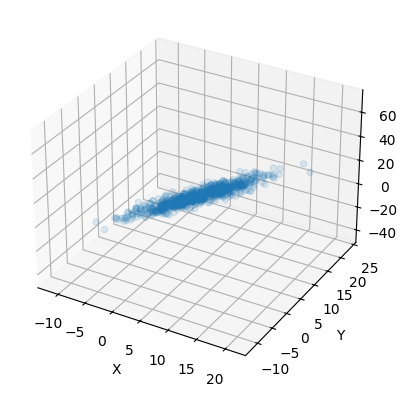

In [36]:
x = np.random.normal(5, 5, 800)
y = np.random.normal(5, 5, 800)
z = 3*x + -2* y + 5 + np.random.normal(0,1,800)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z, alpha=0.125)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

A variável ```z``` acima é gerada através de um modelo linear $3x - 2y + 5$ sobreposto a um ruído Gaussiano.

a) Calcule através do método acima os coeficientes $w_1, w_2, w_0$ do modelo $z=w_1 x + w_2 y + w_0$ que melhor ajusta o cojunto de pontos das variáveis ```x```, ```y``` e ```z```.

*Nota*: Use a função ```np.linalg.solve(a, b)``` para resolver o sistema $ax=b$.

Coeficientes calculados pelo método das equações normais:
w1 (coeficiente de x): 2.9926
w2 (coeficiente de y): -1.9991
w0 (intercepto): 5.0471


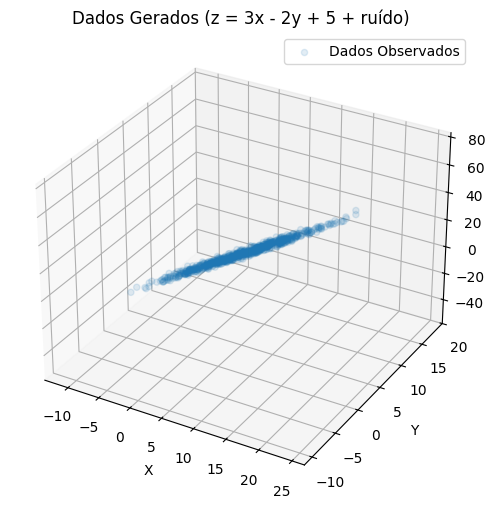

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


np.random.seed(42)
x_data = np.random.normal(5, 5, 800)
y_data = np.random.normal(5, 5, 800)
z_data = 3 * x_data - 2 * y_data + 5 + np.random.normal(0, 1, 800)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_data, y_data, z_data, alpha=0.125, label='Dados Observados')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Dados Gerados (z = 3x - 2y + 5 + ruído)')
plt.legend()

X_matrix = np.column_stack((x_data, y_data, np.ones_like(x_data)))

Y_vector = z_data.reshape(-1, 1)

XTX = X_matrix.T @ X_matrix

XTY = X_matrix.T @ z_data


W_star = np.linalg.solve(XTX, XTY)

w1_calculated = W_star[0]
w2_calculated = W_star[1]
w0_calculated = W_star[2]

print(f"Coeficientes calculados pelo método das equações normais:")
print(f"w1 (coeficiente de x): {w1_calculated:.4f}")
print(f"w2 (coeficiente de y): {w2_calculated:.4f}")
print(f"w0 (intercepto): {w0_calculated:.4f}")

b) Repita a plotagem 3d do enunciado adicionando o plano que descreve a solução do item a).

*Sugestão*

Se as variáveis ```w_0```, ```w_1``` e ```w_2``` contém respectivamente os valores dos parâmetros $w_0$, $w_0$ e $w_2$, então o código abaixo adiciona o plano solicitado:

```
XX, YY = np.meshgrid(np.linspace(min(x),max(x),2),np.linspace(min(y),max(y),2))
ZZ = w0 + w1*XX + w2*YY
ax.plot_surface(XX, YY, ZZ, color='r', alpha=0.5)
```

Text(0.5, 0.92, 'Dados Observados e Plano de Regressão Multilinear')

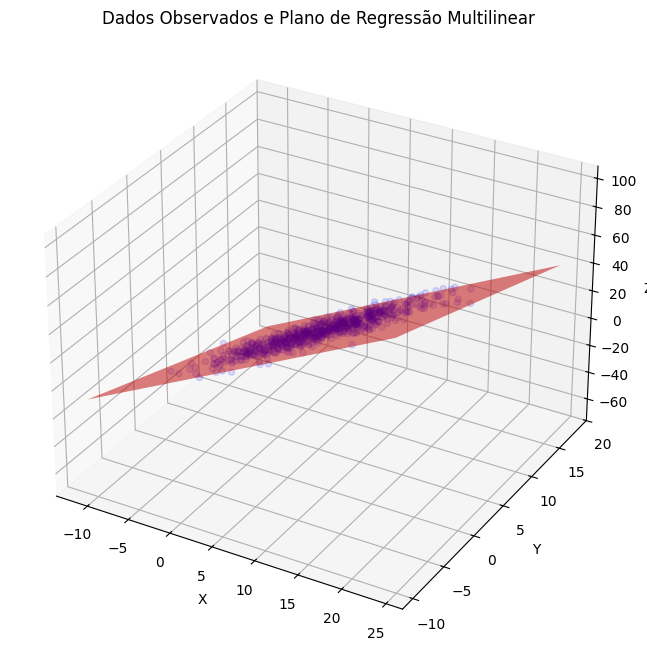

In [39]:
if 'x_data' not in locals():
    print("Recalculando dados e coeficientes para o plot...")
    np.random.seed(42)
    x_data = np.random.normal(5, 5, 800)
    y_data = np.random.normal(5, 5, 800)
    z_data = 3 * x_data - 2 * y_data + 5 + np.random.normal(0, 1, 800)

    X_matrix = np.column_stack((x_data, y_data, np.ones_like(x_data)))
    XTX = X_matrix.T @ X_matrix
    XTY = X_matrix.T @ z_data
    W_star = np.linalg.solve(XTX, XTY)
    w1_calculated = W_star[0]
    w2_calculated = W_star[1]
    w0_calculated = W_star[2]
    print(f"Coeficientes recalculados: w1={w1_calculated:.4f}, w2={w2_calculated:.4f}, w0={w0_calculated:.4f}\n")



fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(x_data, y_data, z_data, alpha=0.125, label='Dados Observados', c='blue')

x_plane_range = np.linspace(min(x_data), max(x_data), 20)
y_plane_range = np.linspace(min(y_data), max(y_data), 20)
XX, YY = np.meshgrid(x_plane_range, y_plane_range)


ZZ = w0_calculated + w1_calculated * XX + w2_calculated * YY


ax.plot_surface(XX, YY, ZZ, color='r', alpha=0.5, label='Plano de Regressão', rstride=100, cstride=100, linewidth=0)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Dados Observados e Plano de Regressão Multilinear')

c) Encontre os coeficientes usando a classe ```linear_model.LinearRegression``` do pacote```sklearn```.
Para montar o vetor de variáveis independentes, monte uma matriz com ```np.array([x,y]).T```.
O vetor de variáveis dependentes é o próprio vetor ```z```.

In [42]:

if 'x_data' not in locals() or 'y_data' not in locals() or 'z_data' not in locals():
    print("Gerando dados x, y, z...")
    np.random.seed(42)
    x_data = np.random.normal(5, 5, 800)
    y_data = np.random.normal(5, 5, 800)
    z_data = 3 * x_data - 2 * y_data + 5 + np.random.normal(0, 1, 800)

X_sklearn = np.array([x_data, y_data]).T


y_target_sklearn = z_data

linear_reg_model = LinearRegression()


linear_reg_model.fit(X_sklearn, y_target_sklearn)


w0_sklearn = linear_reg_model.intercept_

w1_sklearn = linear_reg_model.coef_[0]
w2_sklearn = linear_reg_model.coef_[1]

print(f"Coeficientes calculados pelo sklearn.LinearRegression:")
print(f"w1 (coeficiente de x): {w1_sklearn:.4f}")
print(f"w2 (coeficiente de y): {w2_sklearn:.4f}")
print(f"w0 (intercepto): {w0_sklearn:.4f}")

if 'w0_calculated' in locals():
    print(f"\nComparação com o método das equações normais (item 2.a):")
    print(f"w1 (manual): {w1_calculated:.4f}")
    print(f"w2 (manual): {w2_calculated:.4f}")
    print(f"w0 (manual): {w0_calculated:.4f}")

Coeficientes calculados pelo sklearn.LinearRegression:
w1 (coeficiente de x): 2.9926
w2 (coeficiente de y): -1.9991
w0 (intercepto): 5.0471

Comparação com o método das equações normais (item 2.a):
w1 (manual): 2.9926
w2 (manual): -1.9991
w0 (manual): 5.0471


### Exercício 2.2 - Prevendo fenômenos periódicos

O seguinte [arquivo](https://gitlab.uspdigital.usp.br/thiago/curso-ai-intro-ap/-/raw/main/INMET_SE_SP_A705_BAURU.zip) contém dados do Instituto Nacional de Meterologia sobre precipitação na estação A705 em Bauru, desde 2001.

O código a seguir recupera o arquivo e extrai seu conteúdo na pasta ```inmet_bauru```.

In [18]:
!wget https://gitlab.uspdigital.usp.br/thiago/curso-ai-intro-ap/-/raw/main/INMET_SE_SP_A705_BAURU.zip -O inmet_bauru.zip
!unzip -o inmet_bauru.zip -d inmet_bauru

--2025-05-27 13:44:11--  https://gitlab.uspdigital.usp.br/thiago/curso-ai-intro-ap/-/raw/main/INMET_SE_SP_A705_BAURU.zip
Resolving gitlab.uspdigital.usp.br (gitlab.uspdigital.usp.br)... 200.144.248.41
Connecting to gitlab.uspdigital.usp.br (gitlab.uspdigital.usp.br)|200.144.248.41|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4498115 (4.3M) [application/octet-stream]
Saving to: ‘inmet_bauru.zip’

inmet_bauru.zip     100%[===================>]   4.29M  3.56MB/s    in 1.2s    

2025-05-27 13:44:14 (3.56 MB/s) - ‘inmet_bauru.zip’ saved [4498115/4498115]

Archive:  inmet_bauru.zip
  inflating: inmet_bauru/INMET_SE_SP_A705_BAURU_01-01-2024_A_30-04-2024.CSV  
  inflating: inmet_bauru/INMET_SE_SP_A705_BAURU_01-01-2023_A_31-12-2023.CSV  
  inflating: inmet_bauru/INMET_SE_SP_A705_BAURU_01-01-2022_A_31-12-2022.CSV  
  inflating: inmet_bauru/INMET_SE_SP_A705_BAURU_01-01-2021_A_31-12-2021.CSV  
  inflating: inmet_bauru/INMET_SE_SP_A705_BAURU_01-01-2020_A_31-12-2020.CSV 

Podemos usar o leitor de csv do Python para processar estes arquivos.
Note alguns aspectos:
 * As entradas estão organizadas por *horas*.
 * O campo ```PRECIPITAÇÃO TOTAL, HORÁRIO (mm)``` contém a precipitação total em milímetros que caiu durante uma hora.
 * Há uma inconsistência nos campos de data e horas.
 Alguns arquivos usam o campo ```DATA (YYYY-MM-DD)```, outros usam o campo ```Data``` para designar a data.
 Do mesmo modo, alguns usam o campo ```HORA (UTC)```, outros usam o campo ```Hora (UTC)```.
 Em ambos os casos, usa-se o fuso UTC.
 * Nem todo horário possui dados. Há uma nova inconsistência aqui.
 Alguns arquivos usam o valor -9999 para indicar uma entrada sem dados.
 Outros deixam esta entrada em vazio.

 O código abaixo cuida do processamento destes dados, usando a clase ```datetime```.

 Ele produz as seguintes variáveis:

 * ```data_inicial```. Um objeto ```datetime``` que marca um momento de referência (aqui, arbitrariamente definido como as zero horas do dia 1/1/2001.

 * ```datas```. Um vetor com objetos ```datetime``` que contém *todas* as horas contempladas pelo arquivo, inclusive as que não têm dados válidos de precipitação.

  * ```datas_validas```. Um vetor com objetos ```datetime``` que contém *todas* as horas que contém dados válidos de precipitação.

 *```horas_validas```. Um vetor de inteiros correspondentes às horas que contém dados de precipitação. As horas são definidas como a quantidade de horas passadas entre o momento em que elas ocorreram e  ```data_inicial```.

 *```preps```. Um vetor de floats com os dados de precipitação em mm correspondentes às ```datas_validas```.

In [19]:
import csv
import datetime
import pathlib

# Data referência: 0 horas do dia 1/1/2001
data_inicial =  datetime.datetime.strptime("00:00 2001-01-01", "%H:%M %Y-%m-%d").replace(tzinfo=datetime.timezone.utc)

horas_validas = []
datas_validas = []
preps = []
datas = []
dados_presentes = []
arquivos = sorted(pathlib.Path("inmet_bauru").glob("INMET_SE_SP_A705_BAURU_*_A_31-12-*.CSV"), key=lambda path:path.name[-8:-4])
for f in arquivos:
    print(f)
    with open(f, encoding="iso-8859-1") as arquivo:
        # Pula 8 linhas
        for i in range(8):
            arquivo.readline()
        dr = csv.DictReader(arquivo, delimiter=";")
        campo_data = 'DATA (YYYY-MM-DD)'
        if campo_data not in dr.fieldnames:
            campo_data = 'Data'
        campo_hora = 'HORA (UTC)'
        if campo_hora not in dr.fieldnames:
            campo_hora = 'Hora UTC'
        for row in dr:
            dados_validos = 0
            try:
                data = datetime.datetime.strptime(row[campo_data] + " " + row[campo_hora], "%Y-%m-%d %H:%M").replace(tzinfo=datetime.timezone.utc)
            except ValueError:
                data = datetime.datetime.strptime(row[campo_data] + " " + row[campo_hora], "%Y/%m/%d %H%M %Z").replace(tzinfo=datetime.timezone.utc)
            datas.append(data)
            delta = data - data_inicial
            try:
                prep = float(row['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'].replace(",","."))
                if prep>=0:
                    datas_validas.append(data)
                    horas_validas.append(int(24*delta.days + delta.seconds/3600))
                    preps.append(prep)
                    dados_validos = 1
            except ValueError:
                pass
            dados_presentes.append(dados_validos)
datas_validas = np.array(datas_validas)
horas_validas = np.array(horas_validas)
preps = np.array(preps)
dados_presentes = np.array(dados_presentes)

inmet_bauru/INMET_SE_SP_A705_BAURU_30-08-2001_A_31-12-2001.CSV
inmet_bauru/INMET_SE_SP_A705_BAURU_01-01-2002_A_31-12-2002.CSV
inmet_bauru/INMET_SE_SP_A705_BAURU_01-01-2003_A_31-12-2003.CSV
inmet_bauru/INMET_SE_SP_A705_BAURU_01-01-2004_A_31-12-2004.CSV
inmet_bauru/INMET_SE_SP_A705_BAURU_01-01-2005_A_31-12-2005.CSV
inmet_bauru/INMET_SE_SP_A705_BAURU_01-01-2006_A_31-12-2006.CSV
inmet_bauru/INMET_SE_SP_A705_BAURU_01-01-2007_A_31-12-2007.CSV
inmet_bauru/INMET_SE_SP_A705_BAURU_01-01-2008_A_31-12-2008.CSV
inmet_bauru/INMET_SE_SP_A705_BAURU_01-01-2009_A_31-12-2009.CSV
inmet_bauru/INMET_SE_SP_A705_BAURU_01-01-2010_A_31-12-2010.CSV
inmet_bauru/INMET_SE_SP_A705_BAURU_01-01-2011_A_31-12-2011.CSV
inmet_bauru/INMET_SE_SP_A705_BAURU_01-01-2012_A_31-12-2012.CSV
inmet_bauru/INMET_SE_SP_A705_BAURU_01-01-2013_A_31-12-2013.CSV
inmet_bauru/INMET_SE_SP_A705_BAURU_01-01-2014_A_31-12-2014.CSV
inmet_bauru/INMET_SE_SP_A705_BAURU_01-01-2015_A_31-12-2015.CSV
inmet_bauru/INMET_SE_SP_A705_BAURU_01-01-2016_A_31-12-2

Observa-se que há muitos dados faltantes.
A plotagem a seguir indica os momentos para os quais há dados.
Note em particular a grande lacuna no início de 2004.

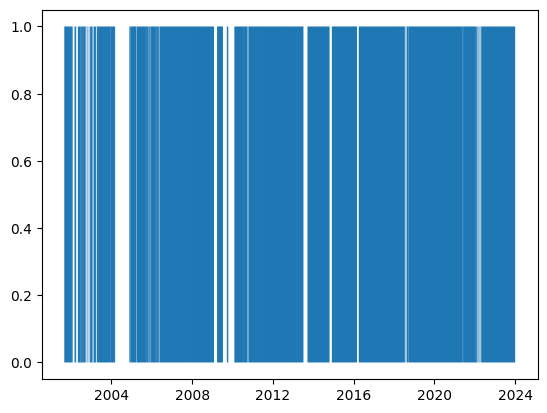

In [20]:
plt.fill_between(datas,dados_presentes,0)

Podemos visualizar os dados de precipitação:

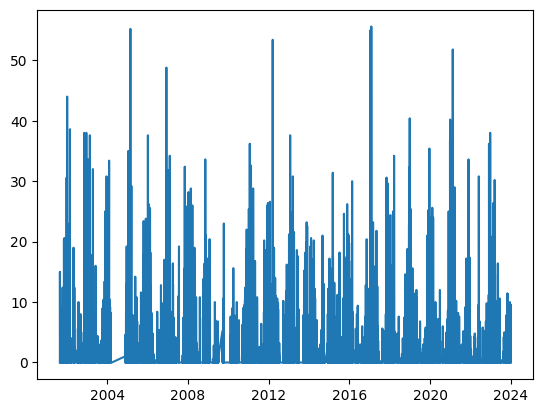

In [21]:
plt.plot(datas_validas,preps)

Apesar de todo o ruído, observa-se no gráfico um fenômeno semi-periódico, que parece se repetir todo ano.
Isso é natural, dada a forte influência das estações do ano no regime pluviométrico.

Podemos identificar as componentes periódicas de uma série temporal usando uma regressão multi-linear com séries harmônicas.

De fato, se uma variável $y(t)$ possui uma componente periódica de período $T$, podemos aproximá-la pela série:

$\bar{y} + \sum_{i=1}^n s_i \sin(2\pi it/T) + c_i \cos(2\pi it/T)$

onde $\bar{y}$ é o valor médio da variável e $s_i$ e $c_i$, com $i$ de $1$ até $n$, são os coeficientes das funções seno e cosseno em diferentes subharmônicas do período principal $T$.

Estes coeficientes, mesmo em cenários de dados incompletos, podem ser obtidos por regressão multilinear.

Vamos fazê-lo para os dados de precipitação com 6 harmônicos.

Para tanto,

a) Monte a matriz de variáveis explicativas:

Considere que um ano *solar* tem aproximadamente 365 dias e 6 horas, ou seja, 8766 horas.
Este será o período base.

Vamos criar duas matrizes, a matriz ```senos``` com os senos e a matriz ```cossenos``` com os cossenos.

A matriz dos senos deve ter 6 colunas. Na sua $j$-ésima coluna os senos do vetor ```horas_validas``` multiplicado por $j+1$ (ou seja, começando em 1 e terminando em 6) e dividido por $2\pi/8766$.

A matriz dos cossenos deve ser equivalente, mas com a função cosseno.

Monte a matriz completa de variáveis explicativas ```senos_cossenos```  com o comando  ```senos_cossenos = np.concat([senos, cossenos], axis=1)```

Verifique que a matriz ```senos_cossenos``` tem 12 colunas e tantas linhas quanto as entradas no vetor ```preps```.


In [43]:
if 'horas_validas' not in locals() or not isinstance(horas_validas, np.ndarray):
    print("A variável 'horas_validas' não foi encontrada ou não é um array NumPy.")
    print("Por favor, execute o código de carregamento de dados de precipitação primeiro.")
    horas_validas = np.linspace(0, 8766 * 5, 1000)
    preps = np.random.rand(1000)
    print("Usando dados placeholder para 'horas_validas' e 'preps'.")

T_periodo = 8766.0


num_harmonicos = 6


t = horas_validas.reshape(-1, 1)

harmonic_indices = np.arange(1, num_harmonicos + 1).reshape(1, -1)


argument_matrix = (t * harmonic_indices * 2 * np.pi) / T_periodo


senos_matrix = np.sin(argument_matrix)


cossenos_matrix = np.cos(argument_matrix)


senos_cossenos = np.concatenate([senos_matrix, cossenos_matrix], axis=1)


print(f"Forma da matriz 'senos_matrix': {senos_matrix.shape}")
print(f"Forma da matriz 'cossenos_matrix': {cossenos_matrix.shape}")
print(f"Forma da matriz 'senos_cossenos': {senos_cossenos.shape}")
print(f"Número de entradas em 'preps': {len(preps)}")
print(f"Número de entradas em 'horas_validas': {len(horas_validas)}")

Forma da matriz 'senos_matrix': (173176, 6)
Forma da matriz 'cossenos_matrix': (173176, 6)
Forma da matriz 'senos_cossenos': (173176, 12)
Número de entradas em 'preps': 173176
Número de entradas em 'horas_validas': 173176


b) Usando a classe ```LinearRegression```, faça a regressão linear do vetor ```preps``` usando esta variável explicativa.

Mostre o comportamento anualizado.
Para isso, monte um vetor explicativo que abrange apenas o período de um ano (repetindo o processo do item a), mas agora, no lugar de ```horas_validas```, use ```np.arange(0,8766)```.
`
Usando o método ```predict```do seu modelo, crie um vetor de precipitação prevista.
Note que este vetor tem 8766 entradas, uma para cada hora de um ano.

Plote este vetor com o método ```plt.plot```.
Determine o momento de máxima precipitação.

Modelo treinado. Intercepto (valor médio ajustado): 0.1420

Máxima precipitação horária prevista pelo modelo: 0.3539 mm/hora
Ocorre na hora do ano: 343
Isso corresponde aproximadamente a: 15 de January, 07:00


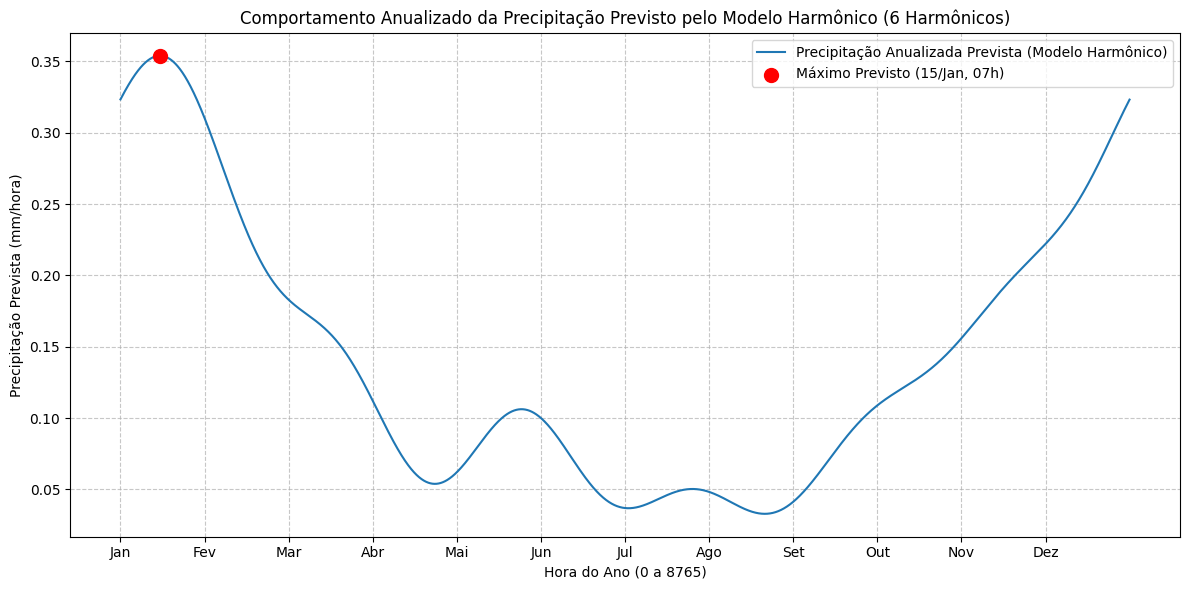

In [44]:
model_precipitacao = LinearRegression(fit_intercept=True)
model_precipitacao.fit(senos_cossenos, preps)

print(f"Modelo treinado. Intercepto (valor médio ajustado): {model_precipitacao.intercept_:.4f}")

T_periodo = 8766.0
num_harmonicos = 6


horas_ano = np.arange(0, int(T_periodo))


t_ano = horas_ano.reshape(-1, 1)
harmonic_indices_ano = np.arange(1, num_harmonicos + 1).reshape(1, -1)

argument_matrix_ano = (t_ano * harmonic_indices_ano * 2 * np.pi) / T_periodo
senos_matrix_ano = np.sin(argument_matrix_ano)
cossenos_matrix_ano = np.cos(argument_matrix_ano)
senos_cossenos_ano = np.concatenate([senos_matrix_ano, cossenos_matrix_ano], axis=1)


precipitacao_prevista_ano = model_precipitacao.predict(senos_cossenos_ano)


plt.figure(figsize=(12, 6))
plt.plot(horas_ano, precipitacao_prevista_ano, label='Precipitação Anualizada Prevista (Modelo Harmônico)')
plt.xlabel(f"Hora do Ano (0 a {int(T_periodo)-1})")
plt.ylabel("Precipitação Prevista (mm/hora)")
plt.title("Comportamento Anualizado da Precipitação Previsto pelo Modelo Harmônico (6 Harmônicos)")
plt.grid(True, linestyle='--', alpha=0.7)


horas_por_dia = 24
dias_por_mes_aprox = 365.25 / 12
marcas_meses_horas = [i * dias_por_mes_aprox * horas_por_dia for i in range(12)]
nomes_meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
plt.xticks(marcas_meses_horas, nomes_meses)



hora_max_precipitacao_idx = np.argmax(precipitacao_prevista_ano)
max_precipitacao_valor = precipitacao_prevista_ano[hora_max_precipitacao_idx]
hora_max_precipitacao_ano = horas_ano[hora_max_precipitacao_idx]

print(f"\nMáxima precipitação horária prevista pelo modelo: {max_precipitacao_valor:.4f} mm/hora")
print(f"Ocorre na hora do ano: {hora_max_precipitacao_ano}")

dia_do_ano = hora_max_precipitacao_ano // 24 + 1
hora_do_dia = hora_max_precipitacao_ano % 24

data_inicio_ano_ref = datetime.datetime(2001, 1, 1)
momento_max_precipitacao = data_inicio_ano_ref + datetime.timedelta(days=int(dia_do_ano-1), hours=int(hora_do_dia))

print(f"Isso corresponde aproximadamente a: {momento_max_precipitacao.strftime('%d de %B, %H:00')}")


plt.scatter([hora_max_precipitacao_ano], [max_precipitacao_valor], color='red', s=100, zorder=5, label=f'Máximo Previsto ({momento_max_precipitacao.strftime("%d/%b, %Hh")})')
plt.legend()
plt.tight_layout()
plt.show()

c) A precipitação real é um fenômeno abrupto, que se manifesta intensamente por algumas poucas horas e cessa na maior parte do dia.

> Adicionar aspas


Assim é muito difícil compará-lo com uma linha de tendência que abrange um ano inteiro como no item anterior.

Podemos no entanto comparar a precipitação *acumulada* no ano.
O ano de 2020 é de particular interesse para esta comparação por que não tem lacunas.

O código abaixo usa o método ```cumsum()```, de soma cumulativa de um vetor, para obter a precipitação acumulada em 2020 na variável ```precipitacao_acumulada_2020```:

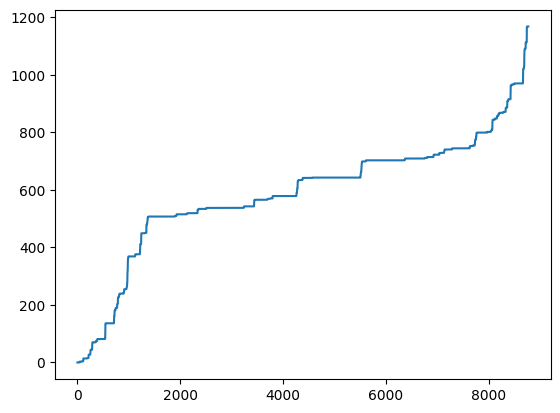

In [24]:
data_inicio_acumulado = datetime.datetime.strptime("00:00 2020-01-01", "%H:%M %Y-%m-%d").replace(tzinfo=datetime.timezone.utc)
delta = data_inicio_acumulado - data_inicial
hora_inicio_acumulado = int(24*(delta.days) + (delta.seconds)/3600)
indice_inicial = np.where(np.array(horas_validas)==hora_inicio_acumulado)[0][0]
precipitacao_acumulada_2020 = preps[indice_inicial:indice_inicial+8766].cumsum()
plt.plot(precipitacao_acumulada_2020)


Use o método ```cumsum()``` no vetor de precipitação previsto obtido no ítem b) e repita a plotagem anterior, sobrepondo-a agora ao vetor de precipitação acumulada prevista.

In [25]:
# Complete com seu código



## 3 Regressão Polinomial

Dado $m$ conjuntos de $n$ dados dispostos na matriz $\mathbf{X} \in {\mathbb{R}}^{m\times n+1}$ rotulados por $\mathbf{y} \in {\mathbb{R}}^m$ já definimos anteriormente que o erro será minimizado quando
$$
\newcommand{\mw}{\mathbf w}\mw = (\newcommand{\mX}{\mathbf X} \mX^T \mX)^{-1} \mX^T \newcommand{\my}{\mathbf y} \my
$$

Derivar por um vetor pode parecer desconfortável, mas não há com o que se preocupar. Lembre-se de que aqui apenas usamos notação de matriz para representar convenientemente um sistema de fórmulas lineares. Portanto, derivamos por cada componente do vetor e depois combinamos as derivadas resultantes em um vetor novamente,
$$
\frac{\partial}{\partial w_{k}}\sum_{i=1}^{m}\left(y^{(i)}-\sum_{j=0}^{n}x_{ij}w_{j}\right)^{2}=0
$$

$$
\sum_{i=1}^{m}2\left(y^{(i)}-\sum_{j=1}^{n}x_{ij}w_{j}\right)\left(\frac{\partial}{\partial w_{k}}\left[y^{(i)}-\sum_{j=1}^{n}x_{ij}w_{j}\right]\right)=0
$$

$$
-2\sum_{i=1}^{m}x_{ik}\left(y^{(i)}-\sum_{j=1}^{n}x_{ij}w_{j}\right)=0 \tag{1}
$$

Pode-se reescrever as equações (1) na forma matricial. Por exemplo, para um polinômio de ordem $4$,
\begin{equation}
              \begin{pmatrix}
              m \, \, \, \, \, \, \, & \sum{x^{(i)}}\, \, & \sum{\left(x^{(i)}\right)^2} & \sum{\left(x^{(i)}\right)^3} & \sum{\left(x^{(i)}\right)^4}  \\
              \sum{x^{(i)}}\, \, & \sum{\left(x^{(i)}\right)^2} & \sum{\left(x^{(i)}\right)^3} & \sum{\left(x^{(i)}\right)^4} & \sum{\left(x^{(i)}\right)^5}  \\
              \sum{\left(x^{(i)}\right)^2} & \sum{\left(x^{(i)}\right)^3} & \sum{\left(x^{(i)}\right)^4} & \sum{\left(x^{(i)}\right)^5} & \sum{\left(x^{(i)}\right)^6}  \\
              \sum{\left(x^{(i)}\right)^3} & \sum{\left(x^{(i)}\right)^4} & \sum{\left(x^{(i)}\right)^5} & \sum{\left(x^{(i)}\right)^6} & \sum{\left(x^{(i)}\right)^7}  \\
              \sum{\left(x^{(i)}\right)^4} & \sum{\left(x^{(i)}\right)^5} & \sum{\left(x^{(i)}\right)^6} & \sum{\left(x^{(i)}\right)^7} & \sum{\left(x^{(i)}\right)^8}  \\
              \end{pmatrix}
              \begin{pmatrix}
              w_0 \\
              w_1 \\
              w_2 \\
              w_3 \\
              w_4 \\
              \end{pmatrix}
              =\begin{pmatrix}
              \sum{ y^{(i)}} \\
              \sum{x^{(i)} y^{(i)}} \\
              \sum{\left(x^{(i)}\right)^2 y^{(i)}} \\
              \sum{\left(x^{(i)}\right)^3 y^{(i)}} \\
              \sum{\left(x^{(i)}\right)^4 y^{(i)}} \\
              \end{pmatrix} \tag{2}
\end{equation}

Note que isso é um caso particular de regressão multidimensional.

## Exercício 3.1

Os dados para o exercício foram gerados artificialmente, com a equação básica dada por,
$$
y=0.3x^3-20x^2+5x-4
$$


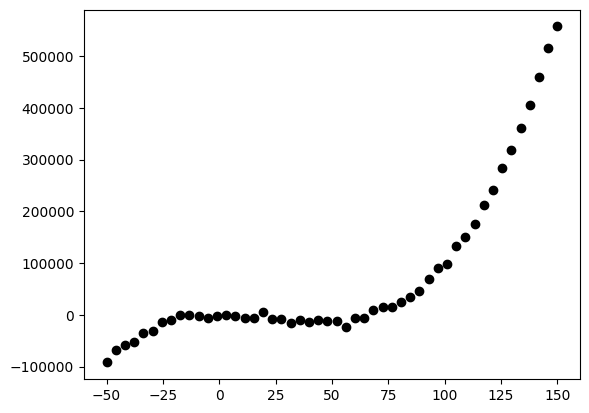

In [26]:
x=np.linspace(-50,150,50)
y=0.3*x**3 - 20*x**2 + 5*x - 4 + 5000*np.random.randn(50)
plt.scatter(x, y, color="black")
plt.show()

Recupere os coeficientes de regressão para polinômios de grau 1, 2 e 3.
Para cada um destes, identifique o erro quadrático médio.

Você pode usar numpy para construir a matriz ${\mathbf X}$, a matriz ${\mathbf X}^T{\mathbf X}$ e o vetor ${\mathbf X}^T {\mathbf y}$. Em seguida use ```numpy.linalg.solve``` para resolver o sistema linear.

Vamos no entanto usar
 ```LinearModel``` e a classe ```PolinomialFeatures``` do pacote ```sklearn.preprocessing``` para gerar a base de vetores de variáveis independentes.
Para construir um objeto de *features* de grau ```n```, use a sintaxe ```PolinomialFeatures(degree=n)```.
O objeto pode ser usado para construir a base de variáveis independentes nos pontos do vetor unidimensional ```x``` com a chamada ao método ```fit_transform(x.reshape(-1,1))```. A matriz de variáveis independentes resultante pode ser usada diretamente por um objeto ```LinearModel``` na chamada ao método ```fit```.

O valor do resíduo quadrático médio pode ser calculado diretamente por ```sklearn``` usando a função  ```sklearn.metrics.mena_squared_error```. Se ```y``` contém os valores reais da variável e ```y_previsto``` os valores previstos, então ```mean_squared_error(y, y_previsto)``` retorna o erro quadrático médio.

## 4. Regularização


A ideia por trás da regularização é ter valores menores dos parâmetros, levando a hipóteses mais simples, mais suaves e com menos tendência ao overfitting.

$$
\newcommand{\om}{\mathbf w} \hat{\mathbf w} = \arg \min_{\mathbf w} \frac{1}{m} \sum_{i=1}^n \textbf{L}\left(y^{(i)}, h_\om\left(\mathbf x^{(i)}\right)\right) + \lambda \textbf{R}(\om)
$$

O termo de regularização $\textbf{R}(\newcommand{\om}{\mathbf w} \om)$ penaliza valores de $\om$ que resultam em modelos mais complexos e, portanto, com variância maior. O hiperparâmetro de regularização $\lambda$ determina o grau de regularização a ser aplicado e geralmente é determinado por meio de validação cruzada (*cross validation*).

As técnicas mais conhecidas de regularização por penalidade são Lasso e Ridge (conforme equações abaixo).
$$
\textbf{R}_{L^2}(\om) =
||\om||_2^2 = \om^T \om  = \sum_{k=1}^n \om_k^2
$$
veja que $w_0$ não faz parte da regularização.

Já a regressão linear de mínimos quadrados em conjunto com a norma L1 é denominada Lasso (*Least Absolute Shrinkage and Selection Operator*), ou simplesmente  L1. Em contraste com a norma L2, a norma L1 incentiva os valores de $w_i$ a serem exatamente zero em dimensões menos informativas (coeficientes menos importantes), reduzindo assim a complexidade do modelo e diminuindo o número de feaures.
$$
\textbf{R}_{L^1}(\om) = \sum_{k=1}^n |w_k|
$$
Portanto, Lasso funciona bem para *seleção de features*, caso existam em grande número.

 ![](https://drive.google.com/uc?export=view&id=1CWvDjEaGkXsqYUWFrgpmFOYXgkWEiPB5)



## Exercício 4.1

a) No exercício anterior, você testou polinômios de até grau 3.
De fato, era sabido pelo enunciado que o grau máximo relevante era esse. Mas essa informação na prática é desconhecida.


Repita o processo agora com um polinômio de grau 12(!)

Preveja o resultado usando o método ```predict``` do objeto ```LinearModel``` (lembre-se que você deve usar a projeção da série ```x``` no vetor de Features).

Mostre a sobreposição entre os dados de treinamento e o resultado do modelo.
Se você colocar a previsão na variável ```ypredict12```, a plotagem desejada é obtida com:


```
plt.plot(x, ypredict12, color="red")
plt.scatter(x, y, color="black")
plt.show()
```

Mostre o coeficiente de 3 grau (índice 3) do modelo obtido. Compare-o com o da curva original.

In [28]:
# Complete com seu código

b) Embora *pontualmente* a curva possa acompanhar melhor os pontos, o modelo está claramente irregular, sintoma de *overfitting*.
Em paricular, a menos que você tenha tido uma sorte extraordinária, o coeficiente de grau 3 deve ter um valor completamente diferente do esperado.

Isso acontece por que a interpolação está sendo dominada por features de grau mais elevado.

Vamos eliminar este fenômeno com uma regularização do tipo Lasso.
A penalização Lasso deve penalizar features inseridas por overfitting, mantendo apenas as realmente necessárias para o modelo.

Para tanto use a classe ```Lasso``` do pacote ```linear_model```.
O seu construtor recebe um parâmetro ```alpha```, correspondente ao peso da penalização.

O seu valor padrão é 1.0. Pode usar este mesmo valor.

O objeto ```Lasso``` funciona da mesma maneira que o ```LinearRegression```.

Repita o trabalho do item anterior


In [29]:
# Complete com seu código